***Importation des Libraires***


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

***Exploration et Analyse des Données (EAD)***


1. Analyse des colonnes et distribution des classes

In [46]:
train_data = pd.read_csv('train.En.csv')
train_data.info()
train_data.head()
train_data.describe()
counts =train_data['sarcastic'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   rephrase             867 non-null    object 
 4   sarcasm              867 non-null    float64
 5   irony                867 non-null    float64
 6   satire               867 non-null    float64
 7   understatement       867 non-null    float64
 8   overstatement        867 non-null    float64
 9   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 271.1+ KB


2. Mesure de la longueur des textes

In [47]:
train_data['word_count'] = train_data['tweet'].apply(lambda x: len(str(x).split()))
train_data['char_count'] = train_data['tweet'].apply(lambda x: len(str(x)))


3. Visualisation des données

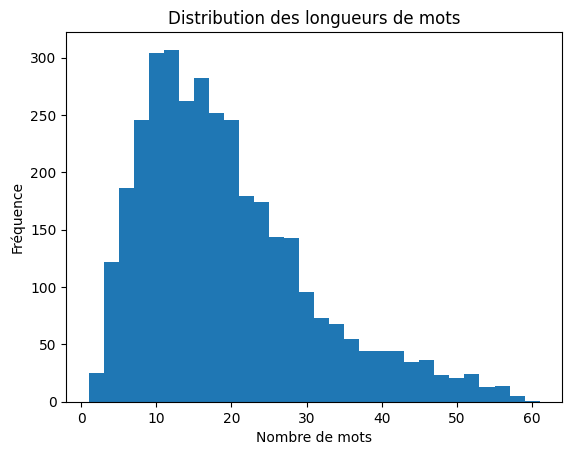

In [48]:
plt.hist(train_data['word_count'], bins=30)
plt.title('Distribution des longueurs de mots')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()

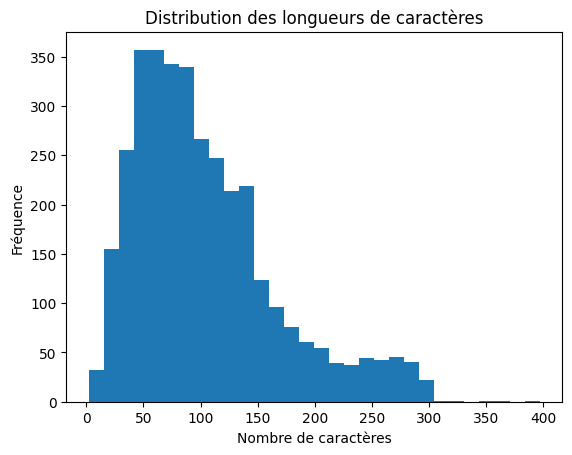

In [49]:
plt.hist(train_data['char_count'], bins=30)
plt.title('Distribution des longueurs de caractères')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.show()

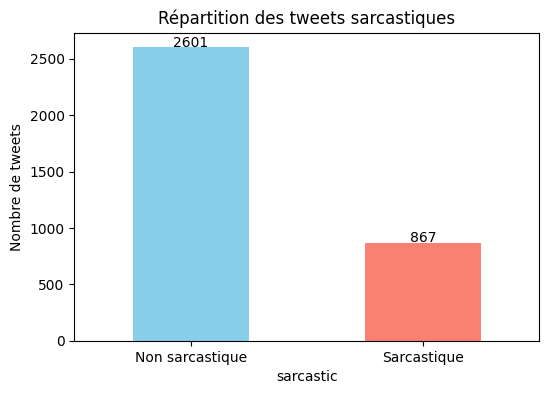

In [50]:
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['skyblue','salmon'])
plt.xticks([0,1], ['Non sarcastique', 'Sarcastique'], rotation=0)
plt.title("Répartition des tweets sarcastiques")
plt.ylabel("Nombre de tweets")
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()

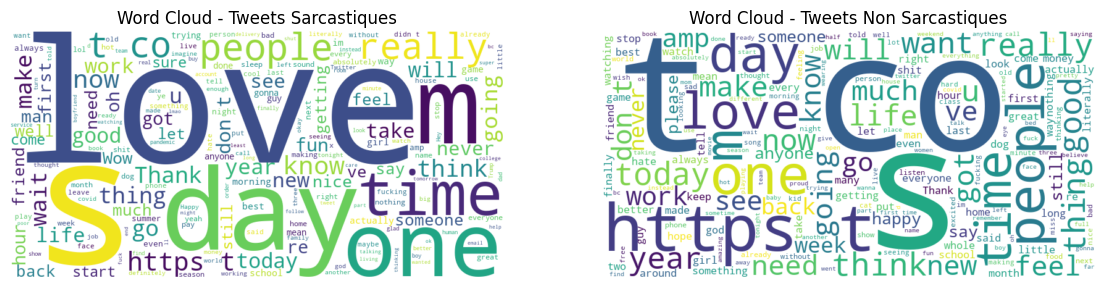

In [51]:
tweets_sarcastic = ' '.join(train_data[train_data['sarcastic'] == 1]['tweet'].astype(str))
tweets_non_sarcastic = ' '.join(train_data[train_data['sarcastic'] == 0]['tweet'].astype(str))
stopwords=set(STOPWORDS)
wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(tweets_sarcastic)
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(tweets_non_sarcastic)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Tweets Sarcastiques')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Tweets Non Sarcastiques')
plt.show()

